In [2]:
> For example, a
stack of elements is a common abstract data type used in computing. We would not
think ‘to add’ two stacks as we would two integers. An algorithm is an abstraction
of a step-by-step procedure for taking input and producing some desired output.
What does it mean ‘to interleave’ two algorithms, perhaps for efficient parallel
processing?

https://www.cs.cmu.edu/~wing/publications/Wing08a.pdf

> For example, a
stack of elements is a common abstract data type used in computing. We would not
think ‘to add’ two stacks as we would two integers. An algorithm is an abstraction
of a step-by-step procedure for taking input and producing some desired output.
What does it mean ‘to interleave’ two algorithms, perhaps for efficient parallel
processing?

https://www.cs.cmu.edu/~wing/publications/Wing08a.pdf

In [16]:
# Symbollic shapes 

Making a quick DSL for working with shapes interactively.

    from methodz import method
    import sympy, shapely, ipywidgets
    sympy.init_printing()
    from shapely.geometry import *
    from shapely.affinity import *

# Symbollic shapes 

Making a quick DSL for working with shapes interactively.

    from methodz import method
    import sympy, shapely, ipywidgets
    sympy.init_printing()
    from shapely.geometry import *
    from shapely.affinity import *

In [17]:
    BaseGeo, Number, Nah = shapely.geometry.base.BaseGeometry, __import__('numbers').Number, type(None)

    BaseGeo, Number, Nah = shapely.geometry.base.BaseGeometry, __import__('numbers').Number, type(None)

In [4]:
* `hvplot` layout composition.
    
        import hvplot, poser, wtypes
        
* `poser` function composition
    
        (poser.λ.range(1, 2) * (
            poser.λ
            + "https://api.github.com/users/tonyfast/gists?page={}".format
            + 'requests.get'
            +  poser.Λ.json()
            + 'pandas.DataFrame'
        ) + poser.λ['pandas.concat'])+ ...

* `wtypes` function composition

        >>> wtypes.Dict[{'a': wtypes.Email, 'b': (0 < wtypes.Integer) < 100}]._schema.toDict()
        {'type': 'object', 'properties': {'a': {'type': 'string', 'format': 'email'}, 'b': {'type': 'integer', 'exclusiveMinimum': 0, 'exclusiveMaximum': 100}}}

* `hvplot` layout composition.
    
        import hvplot, poser, wtypes
        
* `poser` function composition
    
        (poser.λ.range(1, 2) * (
            poser.λ
            + "https://api.github.com/users/tonyfast/gists?page={}".format
            + 'requests.get'
            +  poser.Λ.json()
            + 'pandas.DataFrame'
        ) + poser.λ['pandas.concat'])+ ...

* `wtypes` function composition

        >>> wtypes.Dict[{'a': wtypes.Email, 'b': (0 < wtypes.Integer) < 100}]._schema.toDict()
        {'type': 'object', 'properties': {'a': {'type': 'string', 'format': 'email'}, 'b': {'type': 'integer', 'exclusiveMinimum': 0, 'exclusiveMaximum': 100}}}

    import pandas, hvplot.pandas

    (
        (
            pandas.util.testing.makeDataFrame().hvplot(width=400)
            * pandas.util.testing.makeDataFrame().hvplot(width=400)
        ) * pandas.util.testing.makeDataFrame().hvplot(width=400)
    )

In [18]:
    @method
    class __:
        def __pow__(a: BaseGeo, b: Number):
            return rotate(a, b)
        def __add__(a: BaseGeo, b: BaseGeo):
            return BaseGeo.union(a, b)
        def __mul__(a: BaseGeo, b: Number):
            return scale(a, b, b)
        def __rshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([b, a])
        def __lshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([a,b])
        def __abs__(a: BaseGeo):
            return  translate(a, -a.centroid.x, -a.centroid.y)
    @method
    def __mul__(a: BaseGeo, b: list):
        b = b + [0]*(6-len(b))
        return affine_transform(a, b)
        
    @method
    def __add__(a: BaseGeo, b: tuple):
        return translate(a, *b)
    
    @method
    def __sub__(a: BaseGeo, b: tuple): 
        return translate(a, *map((-1).__mul__, b))
    @method
    def __round__(a: BaseGeo): return  a.buffer(1)
    
    @method
    def __round__(a: BaseGeo, b: Number): return  a.buffer(b)


    @method
    class __:
        def __pow__(a: BaseGeo, b: Number):
            return rotate(a, b)
        def __add__(a: BaseGeo, b: BaseGeo):
            return BaseGeo.union(a, b)
        def __mul__(a: BaseGeo, b: Number):
            return scale(a, b, b)
        def __rshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([b, a])
        def __lshift__(a: BaseGeo, b: BaseGeo):
            return MultiPolygon([a,b])
        def __abs__(a: BaseGeo):
            return  translate(a, -a.centroid.x, -a.centroid.y)
    @method
    def __mul__(a: BaseGeo, b: list):
        b = b + [0]*(6-len(b))
        return affine_transform(a, b)
        
    @method
    def __add__(a: BaseGeo, b: tuple):
        return translate(a, *b)
    
    @method
    def __sub__(a: BaseGeo, b: tuple): 
        return translate(a, *map((-1).__mul__, b))
    @method
    def __round__(a: BaseGeo): return  a.buffer(1)
    
    @method
    def __round__(a: BaseGeo, b: Number): return  a.buffer(b)

In [14]:
    p = Polygon([(0,0), (0,1), (1,0)])

    p = Polygon([(0,0), (0,1), (1,0)])

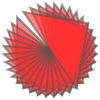

    MultiPolygon([
        p**i for i in range(0, 180, 10)
    ])

In [20]:
    MultiPolygon([
        p**i for i in range(0, 180, 10)
    ])

In [42]:
    
    import IPython, colour
    bound = (-1.0, 1.0, 0.001)
    rgb = (0, 255)
    @ipywidgets.interact
    def da_p(a=bound, b=bound, c=bound, d=bound, e=bound, f=bound, _r=rgb, _g=rgb, _b=rgb, _a=(0.0, 1.0, 0.1), step=(1, 181, 1)):
        color = 'blue red green'.split()
        return IPython.display.SVG(
            (MultiPolygon(
                [Polygon([(a,b), (c,d), (e,f)])**i for i in range(0, 360, step)]
            )*10000)._repr_svg_().replace(
                '</svg>',
                '''<style>''' + ''.join(F"""path:nth-child(3n+{i}) {{ 
                        fill: {color[i]} !important; 
                        opacity: {_a};
                        stroke-width: 0 !important; 
                    }};
            """ for i in range(3)) + '''</style></svg>'''
            ))

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0, min=-1.0, step=0.001), FloatSlider(valu…

In [8]:
    s = abs(p + p**180)

    s = abs(p + p**180)

In [9]:
    
    @ipywidgets.interact
    def deform(i:(-1.1, 1.1)=.1):
        display((s * [1,i,i,1]) >> s)

interactive(children=(FloatSlider(value=0.1, description='i', max=1.1, min=-1.1), Output()), _dom_classes=('wi…

In [10]:
    
    @ipywidgets.interact
    def rot(i:(-float(sympy.pi), float(sympy.pi))=.1):

        display((
            s * [1,-i,i,1]) >> s
        )

interactive(children=(FloatSlider(value=0.1, description='i', max=3.141592653589793, min=-3.141592653589793), …

In [11]:
    import scipy.spatial, numpy

Make some `triangles`.
    
    triangles = scipy.spatial.Delaunay(numpy.random.randn(100, 2))

    import scipy.spatial, numpy

Make some `triangles`.
    
    triangles = scipy.spatial.Delaunay(numpy.random.randn(100, 2))

In [12]:
    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])
    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])

    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])
    delaunay = MultiPolygon([Polygon(triangles.points[list(x),:]) for x in triangles.vertices])

In [13]:
    voronoi = scipy.spatial.Voronoi(triangles.points)
    voronoi = MultiPolygon([Polygon(voronoi.vertices[x,:]) for x in voronoi.regions if len(x) > 3])

    voronoi = scipy.spatial.Voronoi(triangles.points)
    voronoi = MultiPolygon([Polygon(voronoi.vertices[x,:]) for x in voronoi.regions if len(x) > 3])

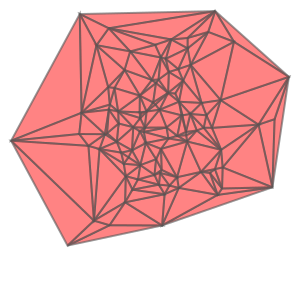

    (delaunay * 10000)**50

In [15]:
    (delaunay * 10000)**50